<a href="https://colab.research.google.com/github/FaithKare/Football-Game-Prediction-/blob/master/Faith_Wangari_Data_science_core_week6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question 

## a) Specyfying the analysis question 

As a football analyst the task it to perfom a prediction result of a game between two teams 1 and 2, based on who's home and who's away and on whether or not the game is friendly including ranking of the teams. 

## b) Metric of Success 

 Be able to create a model that can predict a football match result between two teams given the input: Home team, Away Team and whether the game is friendly or not. Using both the polynomial approach and the logistic approach 



## c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The research consists of 2 datasets; a ranking dataset and a results one.

Ranking has been changing over the years. The current method of calculation is the Elo method

The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

The study is meant to predict the number of scores made by both the away team and home teams.

## d) Experimental design taken 

Indented block Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily: 
*   Data reading , cleaning and merging 
*   EDA
> Univariate analysis , Bivariate analysis
*   Polynomial Regression
> Feature Engineering
>, Multicolinearity,
> Model Building 
, Cross Validation
,Assesing Heteroskadisticity

*   Logistic Regression
> Feature engineering, Model building 




## e) Data Relevance 

This was evaluated against the metric of success (after implementation of solution)

# 2.Reading and Checking The Datasets

In [ ]:
#Importing relevant libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
from sklearn import metrics



## A) The Result Dataset 

In [ ]:
# loading the dataset 
results = pd.read_csv("results.csv")

In [ ]:
#Previewing the top of our dataset
results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [ ]:
#Previewing the bottom of our dataset
results.tail(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
#Determining number of records in the dataset 
results.shape

(40839, 9)

In [ ]:
#Checking if each column is of the appropriate data type
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## Cleaning the Results Dataset



In [ ]:
# changing the column date from object to datetime format 
results["date"] = results["date"].apply(pd.to_datetime) 

# confirming the conversion 
print(results.dtypes) 


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


In [ ]:
#checking for null values 
results.isnull().sum()

#there are no missing values 

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
#dropping duplicates in the dataset
results = results.drop_duplicates()
results.shape 
#there are no duplicated values in the dataset. 

(40839, 9)

In [ ]:
#dropping columns not needed in the analysis 
results_df = results.drop(['city', 'country', 'neutral'], 1)
results_df.head(4)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly


In [ ]:
#Assuming that Month and year will be necessary to the study and so we'll extract them

results_df['year'] = pd.DatetimeIndex(results_df['date']).year
results_df['month'] = pd.DatetimeIndex(results_df['date']).month


## B) The Fifa Ranking Dataset

In [ ]:
# loading the fifa ranking dataset 
ranks = pd.read_csv("fifa_ranking.csv")

In [ ]:
#Previewing the top of the dataset
ranks.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
#Previewing the bottom of the dataset
ranks.tail(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#determining number of records and columns in the dataset 
ranks.shape 

(57793, 16)

In [ ]:
#determining the data types of the columns 
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## Cleaning the fifa ranking dataset 

In [ ]:
#converting the rank_date column from object to datetime format 
ranks["rank_date"] = ranks["rank_date"].apply(pd.to_datetime) 

#confirming the conversion of the data types 
ranks.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [ ]:
#checking for null values in the dataset 
ranks.isnull().sum()
#there are no missing values 

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
#checking for duplicated values 
ranks.duplicated().sum()

#droppping duplicates values in the dataset
ranks = ranks.drop_duplicates()
ranks.shape

(57756, 16)

In [ ]:
#dropping unnecesary columns not needed in the analysis 

ranks_df = ranks.drop(['cur_year_avg', 'cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','country_abrv','total_points','previous_points','rank_change'],axis= True)
ranks_df

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07
57789,206,Bahamas,CONCACAF,2018-06-07
57790,206,Eritrea,CAF,2018-06-07
57791,206,Somalia,CAF,2018-06-07


In [ ]:
#Assuming that Month and year will be necessary to the study and so we'll extract them

ranks_df['year'] = pd.DatetimeIndex(ranks_df['rank_date']).year
ranks_df['month'] = pd.DatetimeIndex(ranks_df['rank_date']).month


## Merging the two datasets 

In [ ]:
# here we will merge the cleaned result dataset and the fifa ranking datset 
#Joining the 2 datasets on the year and month column
combined_df = results_df.merge( ranks_df, left_on=['year', 'month'], right_on=['year', 'month'],how='inner')

combined_df.head()


,date,home_team,away_team,home_score,away_score,tournament,year,month,rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,1,Germany,UEFA,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,2,Italy,UEFA,1993-08-08
2,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,3,Switzerland,UEFA,1993-08-08
3,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,4,Sweden,UEFA,1993-08-08
4,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,5,Argentina,CONMEBOL,1993-08-08


In [ ]:
# checking the number of entries in thd merged dataset
combined_df.shape

(4291108, 12)

In [ ]:
# checking for null values in the merged dataset 
combined_df.isnull().sum()

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
year             0
month            0
rank             0
country_full     0
confederation    0
rank_date        0
dtype: int64

The point of the codes down below is to try and get 2 rank columns, 1 for each team i.e away team and home team. First thing done was to get the away team and home team datasets separately.

In [ ]:
#Creating a hometeam_rank & awayteam_ranks column

df1 = combined_df[combined_df['home_team'] == combined_df['country_full']]
df2 = combined_df[combined_df['away_team'] == combined_df['country_full']]

In [ ]:
# Merging both the away team and home team
combined_df = pd.merge(df1, df2, how = 'left', left_on = ['home_team', 'away_team', 'tournament', 'year', 'home_score', 'away_score'],\
                  right_on = ['home_team', 'away_team', 'tournament', 'year', 'home_score', 'away_score'])
combined_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,year,month_x,rank_x,country_full_x,confederation_x,rank_date_x,date_y,month_y,rank_y,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,19,Colombia,CONMEBOL,1993-08-08,1993-08-01,8.0,67.0,Paraguay,CONMEBOL,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,1993,8,70,Peru,CONMEBOL,1993-08-08,1993-08-01,8.0,5.0,Argentina,CONMEBOL,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,8,22,Uruguay,CONMEBOL,1993-08-08,1993-08-01,8.0,35.0,Ecuador,CONMEBOL,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,8,94,Venezuela,CONMEBOL,1993-08-08,1993-08-01,8.0,8.0,Brazil,CONMEBOL,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,8,58,Senegal,CAF,1993-08-08,1993-08-07,8.0,25.0,Zambia,CAF,1993-08-08


# 3.Data Cleaning the final combined merged dataset

In [ ]:
# getting the dataset size that is columns and rows
combined_df.shape

(18801, 18)

In [ ]:
#dropping unneceassary columns 
combined_df = combined_df.drop(['date_x', 'month_x', 'country_full_x', 'confederation_x','rank_date_x', 'date_y', 'month_y', 'country_full_y', 'confederation_y', 'rank_date_y'], axis = True)

# renaming the columns for uniformity
combined_df.columns = ['hometeam','awayteam','homescore','awayscore','tournament','year', 'homerank','awayrank']


In [ ]:
#checking for null values
combined_df.isnull().sum()

hometeam         0
awayteam         0
homescore        0
awayscore        0
tournament       0
year             0
homerank         0
awayrank      1773
dtype: int64

In [ ]:
#dropping all null values 
combined_df = combined_df.dropna()
combined_df.shape

(17028, 8)

In [ ]:
# preview of the dataset
combined_df.head()

,hometeam,awayteam,homescore,awayscore,tournament,year,homerank,awayrank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58,25.0


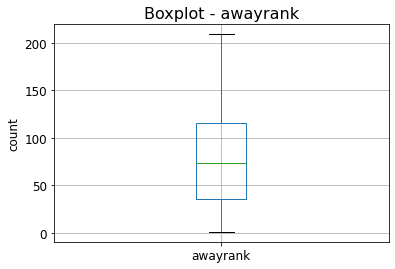

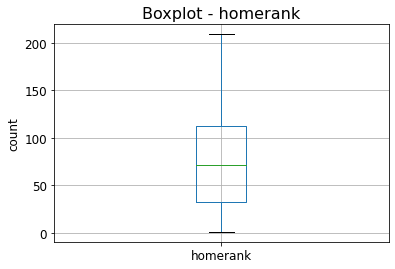

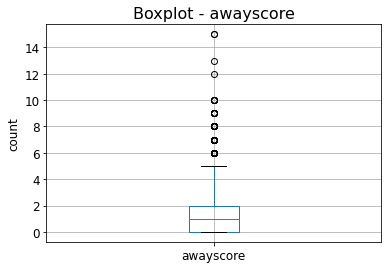

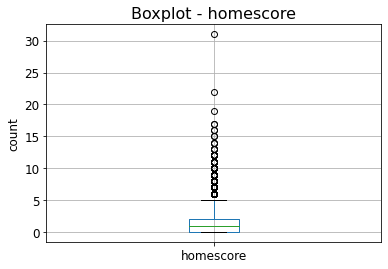

In [ ]:
# checking for outliers 
cols = ['awayrank','homerank', 'awayscore', 'homescore']

for column in cols:
    plt.figure()
    combined_df.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

There are outliers in the homescore and awayscore columns but these wont be removed since in football matches there are instances where vey high scoring occurs. 

In [ ]:
#checking for anomalies 
Q1 = combined_df.quantile(0.25)
Q3 = combined_df.quantile(0.75)
IQR = Q3- Q1
IQR


homescore     2.0
awayscore     2.0
year         11.0
homerank     79.0
awayrank     80.0
dtype: float64

In [ ]:
#exporting the cleaned merged dataset to be used fpr analysis 
combined_df.to_csv('ranking_results.csv')

# 4.Exploratory Data Analyis 

## a)Univariate Analysis 

Text(0.5, 1.0, 'Histogram of home goals scored')

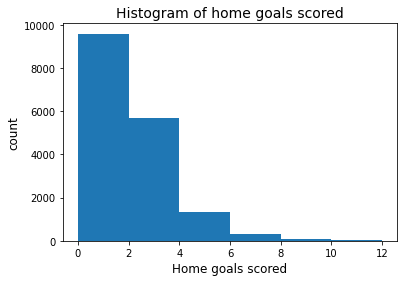

In [ ]:
#histogram of home scores

plt.hist(combined_df['homescore'], bins= [0,2,4,6,8,10,12], rwidth = 2)
plt.xlabel('Home goals scored',fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('Histogram of home goals scored' , fontsize=14)


Text(0.5, 1.0, 'Histogram of away goals scored')

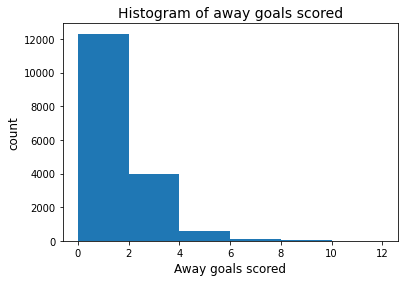

In [ ]:
#histogram of away scores

plt.hist(combined_df['awayscore'], bins= [0,2,4,6,8,10,12], rwidth = 2)
plt.xlabel('Away goals scored',fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('Histogram of away goals scored' , fontsize=14)


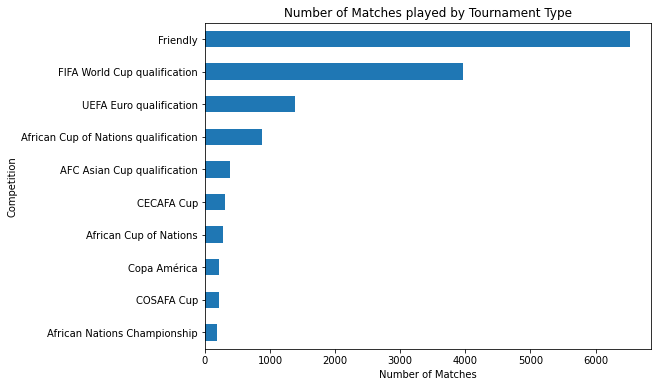

In [ ]:
# Frequency of the top 10 tournaments played 

plt.figure(figsize = [8,6])
top_10 = combined_df['tournament'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Matches')
plt.ylabel('Competition')
plt.title('Number of Matches played by Tournament Type')
plt.show()

Text(0.5, 1.0, 'Histogram of home teams ranked')

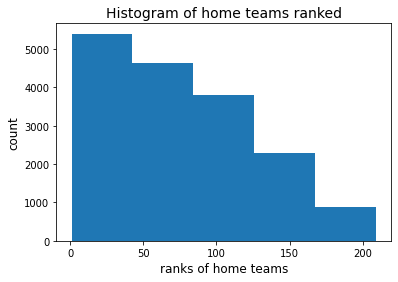

In [ ]:
#histogram of home ranks 

plt.hist(combined_df['homerank'], bins= 5, rwidth = 2)
plt.xlabel('ranks of home teams',fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('Histogram of home teams ranked' , fontsize=14)


Text(0.5, 1.0, 'Histogram of away teams ranked')

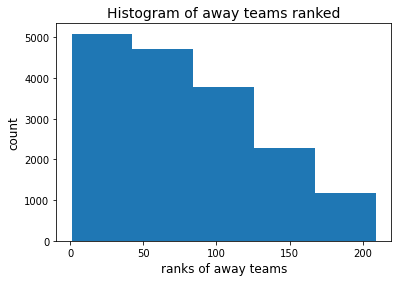

In [ ]:
#histogram of away ranks 

plt.hist(combined_df['awayrank'], bins= 5 , rwidth = 2)
plt.xlabel('ranks of away teams',fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('Histogram of away teams ranked' , fontsize=14)


In [ ]:
#getting the measures of central dispersion 
# Checking on coefficent of variance, skewness and kurtosis on home score variable 

print('The skewness is:', combined_df['homescore'].skew())
print('The kurtosis is:', combined_df['homescore'].kurt())
print('The coefficient of variation is:', combined_df['homescore'].std()/combined_df['homescore'].mean())
print('Home Team Score Quantiles:', combined_df["homescore"].quantile([0.25, 0.5, 0.75]))

The skewness is: 2.3241541210487693
The kurtosis is: 15.241826227675222
The coefficient of variation is: 1.0076485441043306
Home Team Score Quantiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: homescore, dtype: float64


In [ ]:
#getting the measures of central dispersion 
# Checking on coefficent of variance, skewness and kurtosis on away score variable 

print('The skewness is:', combined_df['awayscore'].skew())
print('The kurtosis is:', combined_df['awayscore'].kurt())
print('The coefficient of variation is:', combined_df['awayscore'].std()/combined_df['awayscore'].mean())
print('Away Team Score Quantiles:', combined_df["awayscore"].quantile([0.25, 0.5, 0.75]))


The skewness is: 1.932314870735902
The kurtosis is: 7.193821602483314
The coefficient of variation is: 1.1672940558701566
Away Team Score Quantiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: awayscore, dtype: float64


In [ ]:
#getting the measures of central tendancy of home score 

print('Home Team Score Mean:',combined_df["homescore"].mean())
print('Home Team Score Mode:',combined_df["homescore"].mode())
print('Home Team Score Median:',combined_df["homescore"].median())


Home Team Score Mean: 1.6011275546159267
Home Team Score Mode: 0    1
dtype: int64
Home Team Score Median: 1.0


In [ ]:
#getting the measures of central tendancy of away score 

print('Away Team Score Mean:',combined_df["awayscore"].mean())
print('Away Team Score Mode:',combined_df["awayscore"].mode())
print('Away Team Score Median:',combined_df["awayscore"].median())


Away Team Score Mean: 1.06471693680996
Away Team Score Mode: 0    0
dtype: int64
Away Team Score Median: 1.0


## b) Bivariate Analysis 

In [ ]:
# calculating correlation coefficients between differnt variables.
a = combined_df["awayscore"].corr(combined_df["awayrank"]) 
print(a)
b = combined_df["homescore"].corr(combined_df["homerank"]) 
print(b)

# there is a very low negative correlation for both awayscore and awayrank and homescore and homerank 

-0.18102098619245968
-0.1352967739085968


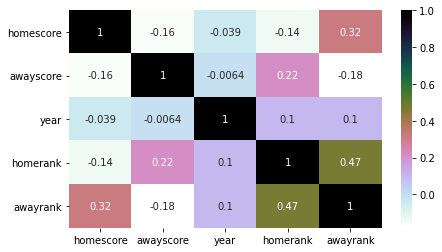

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(7,4)) 
sns.heatmap(combined_df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

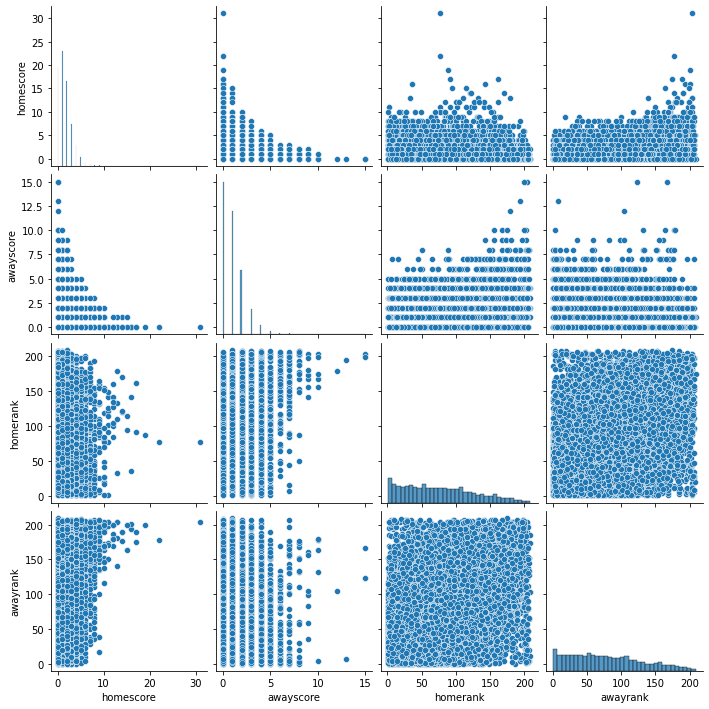

In [ ]:
# pairplot of variables in the combined dataset

sns.pairplot(combined_df[['homescore', 'awayscore', 'homerank','awayrank']])

# from the scatter plots visualizations there is no correlation between the variables.


# 5.Implementing the Solution 

It is necessary to implement the solution of descriptive analysis by modelling using predictive analysis.
We are therefore going to create models using two approcahes the polynomial regression approach and the logistic regression approach.

# 5a).Polynomial Regression 

Polynomial regression is used when a simople linear regression model does not fit the data well. 
From the analysis question above we are going to create two modes that predict the home goals and away goals given: the rank of the away team , the rank of home team and the tournament type.

## Feature Engineering 

Feature engineering transfroms raw data inputs into format the algorithm can understand 

In [ ]:
# getting unique values in the tournament column 
print(combined_df['tournament'].nunique())

# check for the unique values
combined_df['tournament'].unique() 

65


array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [ ]:
#for tournamnet column we need three entries that is 'world cup', 'friendly' and 'other' out of the 101 unique values 

# repalce the Fifa world cup and fifa world cup qualification with world cup 
combined_df["tournament"].replace({"FIFA World Cup": "WorldCup", "FIFA World Cup qualification": "WorldCup"}, inplace=True)

# replace United arab emirates friendship tournament with friendly 
combined_df["tournament"].replace({"United Arab Emirates Friendship Tournament": "Friendly"}, inplace= True)

# replace enteries that are not world cup or friendly with other 
combined_df.replace(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's Cup", 'Gulf Cup', 'Indonesia Tournament', 'Korea Cup',
       'Brazil Independence Cup', 'Copa Ramón Castilla',
       'Oceania Nations Cup', 'CECAFA Cup', 'Copa Félix Bogado',
       'Kirin Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'Mundialito',
       'West African Cup', 'Nehru Cup', 'Merlion Cup', 'UDEAC Cup',
       'Rous Cup', 'Tournoi de France', 'Malta International Tournament',
       'Lunar New Year Cup', 'Dynasty Cup', 'UNCAF Cup', 'Gold Cup',
       'USA Cup', 'Jordan International Tournament', 'Confederations Cup',
       'Island Games','Oceania Nations Cup qualification', 'Simba Tournament',
       'SAFF Cup', 'AFF Championship', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Gold Cup qualification', 'SKN Football Festival', 'UNIFFAC Cup',
       'WAFF Championship', 'Millennium Cup', "Prime Minister's Cup",
       'EAFF Championship', 'AFC Challenge Cup', 'FIFI Wild Cup',
       'ELF Cup', 'UAFA Cup qualification',
       'AFC Challenge Cup qualification', 'African Nations Championship',
       'VFF Cup', 'Dragon Cup', 'ABCS Tournament',
       'Nile Basin Tournament', 'Nations Cup', 'Pacific Games', 'OSN Cup',
       'Copa América qualification', 'Intercontinental Cup'],'Other', inplace=True)



In [ ]:
# confirming the replacements have been done correctly 
combined_df['tournament'].unique() 

array(['WorldCup', 'Friendly', 'Other'], dtype=object)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
#tournament Other = 1, Friendly = 0, WorldCup = 2
combined_df['tournament'] = le.fit_transform(combined_df['tournament'])



## Detecting Multicolinearity 

In [ ]:
# we want to focus on our independent variables only.
independent_only = combined_df.drop(columns=['awayteam','hometeam','homescore','awayscore','year'])

# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

#the table shows how each variable relates to another 

,tournament,homerank,awayrank
tournament,1.000000,0.031655,0.024722
homerank,0.031655,1.000000,0.470225
awayrank,0.024722,0.470225,1.000000


In [ ]:
# we then compute the variance infalation factor (VIF). 
# A measure of how much the variance of regression coefficient in your model increases if your independent variables are correlated.
# creating an inverse matrix of the correlation table above 

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,tournament,homerank,awayrank
tournament,1.001128,-0.025746,-0.012643
homerank,-0.025746,1.284543,-0.603387
awayrank,-0.012643,-0.603387,1.284040


If no independent variables are correlated, you'll expect the VIF for each to be 1.
The away rank, home rank and tournament variables are not correlated

# Polynomial Regression Model 1 

Predict how many goals the home team scored based on team's home rank, away rank and tournament 

In [ ]:
#separating the data to features and label (model 1: Home scores)

X = (combined_df[['homerank','awayrank','tournament']]).values
y = combined_df['homescore'].values

# Splitting the data and training using 80% of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#creating the model
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
print('Polynomial prediction: %d', poly_pred)

Polynomial prediction: %d [1.34248663 2.53511934 2.04069536 ... 0.9752255  1.3627852  0.98104095]


for us to choose an optimal model the model needs to have a low bias and a low varinace.That is to say the model should not capture too many data points and at the same time its should not capture very few data points.

4 degrees of freedom have been used to get the most optimal model. 

In [ ]:
#Evaluating model and calculating the RMSE 
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))

Mean Absolute Error: 1.0141824533758996
Mean Squared Error: 1.987877952083519
Root Mean Squared Error: 1.4099212574053628


To measure an accuracy of the model The RMSE should be 10% of the mean. The Rmse however here is 1.4099 which is very high. This is beacause of the otliers in the home scores and away scores columns which were not removed. 

Furthermore the high RMSE indicates that the model is not optimal. 

## Cross Validating Model 1

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
X = combined_df[['homerank', 'awayrank', 'tournament']].values
y = combined_df['homescore'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  
  # fit a model accordingly
  poly_reg = PolynomialFeatures(degree = 4) 
  X_poly = poly_reg.fit_transform(X)

  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y)

  # assess the accuraccy of the model
  poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, poly_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.44566897691164

Training model 2
Model 2 Root Mean Squared Error: 1.5361116125706018

Training model 3
Model 3 Root Mean Squared Error: 1.3261986389533678

Training model 4
Model 4 Root Mean Squared Error: 1.3348746178461268

Training model 5
Model 5 Root Mean Squared Error: 1.3370740781783634


The RMSE is relative to the dependent variable. Even though the models are not optimal from the evidence of high Root mean squared error , From cross validation the third model is most suitable since it has the least RMSE. 

## Assessing the Heteroskedasticity

In [ ]:
#we create a residual by subtracting the test value from the predicted value of each row in the dataset
residuals = np.subtract(poly_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.11254678750180278

The residual mean is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.11%

a heteroskedasticity test on our residual plot helps us determine if the variability of a given dependent variable unequal.
For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis that the variance is different for at least one pair of datapoints.



In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_pred, residuals)
print(test_result)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are equal')


697.4469684933208
inf
the variances are equal


the variances are equal.

# Polynomial Regression Model 2

Predict how many goals the away team scored based on team's  home and away rank and tournament type

In [ ]:
#separating the data to features and label (model 2: away scores)

X = (combined_df[['homerank','awayrank','tournament']]).values
y = combined_df['awayscore'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#creating the model
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
print('Polynomial prediction: %d', poly_pred)

Polynomial prediction: %d [1.07590353 0.42428961 0.66100681 ... 1.55812278 0.92377961 1.41679116]


for us to choose an optimal model the model needs to have a low bias and a low varinace.That is to say the model should not capture too many data points and at the same time its should not capture very few data points.

3 degrees of freedom have been used to get the most optimal model.



In [ ]:
#Evaluating model and calculating the RMSE 
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))

Mean Absolute Error: 0.8377613605778255
Mean Squared Error: 1.2567484207426756
Root Mean Squared Error: 1.1210479118854269


To measure an accuracy of the model The RMSE should be 10% of the mean. The Rmse however here is 1.121 which is very high. This is beacause of the otliers in the home scores and away scores columns which were not removed.

Furthermore the high RMSE indicates that the model is not optimal.

## Cross Validating Model 2 

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
X = combined_df[['homerank', 'awayrank', 'tournament']].values
y = combined_df['awayscore'].values

folds = KFold(n_splits=4)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  
  # fit a model accordingly
  poly_reg = PolynomialFeatures(degree = 3) 
  X_poly = poly_reg.fit_transform(X)

  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y)

  # assess the accuraccy of the model
  poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, poly_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 4 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1269402672619435

Training model 2
Model 2 Root Mean Squared Error: 1.1478045666455365

Training model 3
Model 3 Root Mean Squared Error: 1.127554831515164

Training model 4
Model 4 Root Mean Squared Error: 1.0826708497990722


Model 4 is the most optimal since it has the lowest RMSE. 

## Assesing the Heteroskedasticity

In [ ]:
#we create a residual by subtracting the test value from the predicted value of each row in the dataset
residuals = np.subtract(poly_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.026039041823580397

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are equal')


1554.8733320652734
the variances are equal


# Challenge the Solutions 

The polynomial regression approoach did not create optomal models. This might be beacuse the indepenndent variables away rank and home rank are categorical -ordinal data. 
We further go ahaed and challenge this solution using the Logistic approach 

# 5b).Logistic Regression 

Logistic regresion algorithms are used for classification tasks that is (yes/no ), (True/False) given a set of independent variables. 
Here we are going to create a model that predicts whether the result of a game between two teams was a win, lose or draw. 

## Feature Engineering 

In [ ]:
# dropping unnecessary columns for logistic regression 

logistic_df = combined_df.drop(['year','hometeam', 'awayteam'], axis=True)
logistic_df.head()

,homescore,awayscore,tournament,homerank,awayrank
0,0,0,2,19,67.0
1,0,1,2,70,5.0
2,0,0,2,22,35.0
3,1,5,2,94,8.0
4,0,0,2,58,25.0


In [ ]:
# creating a new column status of win, draw and lose 
# defining the function f 

def f(row):
  if row['homescore'] > row['awayscore']:
    val = 'win'
  elif row['homescore'] == row['awayscore']:
    val = 'draw'  
  else:
    val = 'Lose'
  return val 

logistic_df['status'] = logistic_df.apply(f, axis =1)
# preview of the new dataset
logistic_df.head()    

,homescore,awayscore,tournament,homerank,awayrank,status
0,0,0,2,19,67.0,draw
1,0,1,2,70,5.0,Lose
2,0,0,2,22,35.0,draw
3,1,5,2,94,8.0,Lose
4,0,0,2,58,25.0,draw


In [ ]:
# categorical boolean mask 
categorical_feature_mask = logistic_df.dtypes == object

# filter categorical columns using mask and turn it into a list 
categorical_cols = logistic_df.columns[categorical_feature_mask].tolist()

# import labelencoder 
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object 
le = LabelEncoder()

# apply le on categorical feature columns
logistic_df[categorical_cols] = logistic_df[categorical_cols].apply(lambda col: le.fit_transform(col))
logistic_df[categorical_cols]

,status
0,1
1,0
2,1
3,0
4,1
...,...
18796,0
18797,0
18798,0
18799,2


In [ ]:
# defining the variables into dependent (y) and idependent variables(x)
x = logistic_df.drop('status', axis = 1 )
y = logistic_df['status']

# splitting the data into train and test
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 25)
# fitting our model 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
    
LogReg.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# using the model to make a prediction
y_pred = LogReg.predict(x_test)

In [ ]:
# evaluating the model 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 952,    0,    0],
       [   0,  788,    0],
       [   0,    0, 1666]])

In [ ]:
# accuracy score 
print('accuracy of logistic regression on testset', format(LogReg.score(x_test,y_test)))

accuracy of logistic regression on testset 1.0


The model made 3 correct predictions of 952, 788 and 1666. The model gave an accuracy score of 100% and this is clearly a sign of overfitting.

# 6.Challenging the Solution 

The polynomial regression model was not accurate since the RMSE achieved was too high and not 10% of the mean of the dependent variable. This may have been beacause of the outliers in the home score and away score variables. 

The logistic regression dataset brings an accuracy of 100% which might be bacuase of overfitting. Hyperparametr tuning should thefore be carried out on the model. With the right parametrs , they can eliminate these chances of overfitting and also help define higher level concepts about the model , such as its complexity. 

# 7.Follow Up Questions 

At this point, we can refine our question or collect new data, all in an iterative process to get at the optimal model. 

a) Did we have the right data - The data was not sufficient to perform polynomial regression since the independent variables ranks of away teams and home teams were ordinal and not continuous . 

However the data was sufficient to perform logistic regression 

b) Do we need another data to answer the question - Yes we needed another data to answer to answer the question using polynomial approach. 



c) Did we have the right question 

Yes